In [ ]:
!pip install --upgrade tensorflow==2.6.0
!pip install --upgrade keras==2.6

In [ ]:
import keras
from keras.datasets import mnist
from matplotlib import pyplot

(x_train, y_train), (x_test, y_test) = mnist.load_data()

for i in range(0, 64):
    pyplot.subplot(8, 8, i + 1)
    pyplot.imshow(x_train[i], cmap = "gray")

pyplot.show()

In [3]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
# reshapeの-1は784列で自動的に1を意味する

x_train = x_train.reshape(-1, 784).astype("float32") / 255
x_test = x_test.reshape(-1, 784).astype("float32") / 255

x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [5]:
y_train = keras.utils.np_utils.to_categorical(y_train.astype("int32"), 10)
y_test = keras.utils.np_utils.to_categorical(y_test.astype("int32"), 10)

In [6]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [7]:
# 最低限のニューラルネットワークでMNIST分類を解く

# 入力と出力を指定
in_size = 28 * 28
out_size = 10

# モデルの構造を定義
Dense = keras.layers.Dense
model = keras.models.Sequential()
model.add(Dense(512, activation = "relu", input_shape = (in_size, )))
model.add(Dense(out_size, activation = "softmax"))

# モデルを構築
model.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"])

# 学習を実行
model.fit(x_train, y_train, 
         batch_size = 20, epochs = 20)

# モデルを評価
score = model.evaluate(x_test, y_test, verbose = 1)
print("正解率 = ", score[1], "loss=", score[0])

Epoch 1/20
3000/3000 [==============================] - 11s 3ms/step - loss: 0.1885 - accuracy: 0.9436
Epoch 2/20
3000/3000 [==============================] - 8s 3ms/step - loss: 0.0778 - accuracy: 0.9761
Epoch 3/20
3000/3000 [==============================] - 8s 3ms/step - loss: 0.0540 - accuracy: 0.9822
Epoch 4/20
3000/3000 [==============================] - 8s 3ms/step - loss: 0.0377 - accuracy: 0.9878
Epoch 5/20
3000/3000 [==============================] - 8s 3ms/step - loss: 0.0297 - accuracy: 0.9906
Epoch 6/20
3000/3000 [==============================] - 8s 3ms/step - loss: 0.0217 - accuracy: 0.9927
Epoch 7/20
3000/3000 [==============================] - 8s 3ms/step - loss: 0.0187 - accuracy: 0.9937
Epoch 8/20
3000/3000 [==============================] - 8s 3ms/step - loss: 0.0152 - accuracy: 0.9947
Epoch 9/20
3000/3000 [==============================] - 8s 3ms/step - loss: 0.0146 - accuracy: 0.9947
Epoch 10/20
3000/3000 [==============================] - 8s 3ms/step - loss: 0.01

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/50
469/469 [==============================] - 6s 6ms/step - loss: 0.2429 - accuracy: 0.9267 - val_loss: 0.1212 - val_accuracy: 0.9615
Epoch 2/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1025 - accuracy: 0.9686 - val_loss: 0.0909 - val_accuracy: 0.9719
Epoch 3/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0752 - accuracy: 0.9775 - val_loss: 0.0765 - val_accuracy: 0.9782
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0607 - accuracy: 0.9821 - val_loss: 0.0837 - val_accuracy: 0.9770
Epoch 5/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0515 - accuracy: 0.9846 - val_loss: 0.0771 - val_accuracy: 0.9820
Epoch 6/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0425 - accuracy: 0.9872 - val_loss: 0.0776 - val_accuracy: 0.9802
Epoch 7/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0370 - 

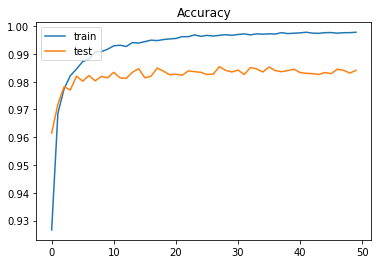

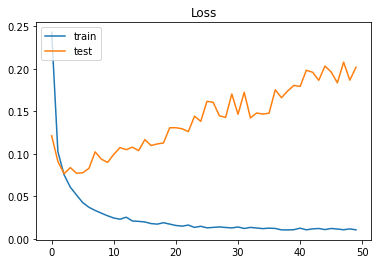

In [ ]:
# NLPでMNISTの分類問題に挑戦しよう
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
# from keras.optimizers import RMSprop
from tensorflow.keras.optimizers import RMSprop
from keras.datasets import mnist
import matplotlib.pyplot as plt

# 入力と出力を指定
in_size = 28 * 28
out_size = 10

#MNISTのデータの読み込み
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# データを28*28=784の一次元配列に変換
x_train = x_train.reshape(-1, 784).astype("float32") / 255
x_test = x_test.reshape(-1, 784).astype("float32") / 255
# ラベルデータをone-hotベクトルに治す
y_train = keras.utils.np_utils.to_categorical(y_train.astype("int32"), 10)
y_test = keras.utils.np_utils.to_categorical(y_test.astype("int32"), 10)

# MLPモデル構造を定義
model = Sequential()
model.add(Dense(512, activation = "relu", input_shape = (in_size, )))
model.add(Dropout(0.2))
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(out_size, activation = "softmax"))

# モデルをコンパイル
model.compile(
    loss = "categorical_crossentropy",
    optimizer = RMSprop(),
    metrics = ["accuracy"]
)

# 学習を実行
hist = model.fit(x_train, y_train, 
                 batch_size = 128,
                 epochs = 50,
                 verbose = 1,
                 validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose = 1)
print("正解率 = ", score[1], "loss = ", score[0])

# 学習の様子をグラフへ描画
# 正解率の推移をプロット
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("Accuracy")
plt.legend(["train", "test"], loc = "upper left")
plt.show()

# ロスの推移をプロット
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Loss")
plt.legend(["train", "test"], loc = "upper left")
plt.show()

Epoch 1/12
469/469 [==============================] - 33s 17ms/step - loss: 0.2214 - accuracy: 0.9329 - val_loss: 0.0547 - val_accuracy: 0.9832
Epoch 2/12
469/469 [==============================] - 8s 16ms/step - loss: 0.0826 - accuracy: 0.9759 - val_loss: 0.0374 - val_accuracy: 0.9870
Epoch 3/12
469/469 [==============================] - 7s 16ms/step - loss: 0.0626 - accuracy: 0.9819 - val_loss: 0.0351 - val_accuracy: 0.9878
Epoch 4/12
469/469 [==============================] - 7s 16ms/step - loss: 0.0533 - accuracy: 0.9845 - val_loss: 0.0377 - val_accuracy: 0.9888
Epoch 5/12
469/469 [==============================] - 7s 16ms/step - loss: 0.0469 - accuracy: 0.9861 - val_loss: 0.0346 - val_accuracy: 0.9897
Epoch 6/12
469/469 [==============================] - 8s 16ms/step - loss: 0.0462 - accuracy: 0.9869 - val_loss: 0.0329 - val_accuracy: 0.9900
Epoch 7/12
469/469 [==============================] - 7s 16ms/step - loss: 0.0432 - accuracy: 0.9876 - val_loss: 0.0383 - val_accuracy: 0.989

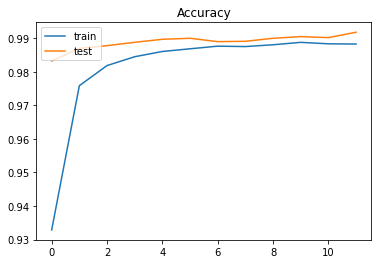

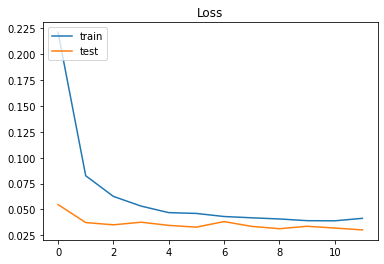

In [ ]:
# CNNでMNISTの分類問題に挑戦
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
# from keras.optimizers import RMSprop
from tensorflow.keras.optimizers import RMSprop
from keras.datasets import mnist
import matplotlib.pyplot as plt

# 入力と出力を指定 --- (*1)
im_rows = 28 # 画像の縦ピクセルサイズ
im_cols = 28 # 画像の横ピクセルサイズ
im_color = 1 # 画像の色空間/グレイスケール
in_shape = (im_rows, im_cols, im_color)
out_size = 10

# MNISTのデータを読み込み 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 読み込んだデータをの三次元配列に変換 --- (*1a)
X_train = X_train.reshape(-1, im_rows, im_cols, im_color)
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape(-1, im_rows, im_cols, im_color)
X_test = X_test.astype('float32') / 255
# ラベルデータをone-hotベクトルに直す
# y_train = keras.utils.to_categorical(y_train.astype('int32'),10)
# y_test = keras.utils.to_categorical(y_test.astype('int32'),10)
y_train = keras.utils.np_utils.to_categorical(y_train.astype("int32"), 10)
y_test = keras.utils.np_utils.to_categorical(y_test.astype("int32"), 10)

# CNNモデル構造を定義 --- (*2)
model = Sequential()
model.add(Conv2D(32, 
          kernel_size=(3, 3),
          activation='relu',
          input_shape=in_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(out_size, activation='softmax'))

# モデルをコンパイル --- (*3)
model.compile(
    loss='categorical_crossentropy', # 多クラス分類課題はこれ
    optimizer=RMSprop(),
    metrics=['accuracy'])

# 学習を実行 --- (*4)
hist = model.fit(X_train, y_train,
          batch_size=128, 
          epochs=12,
          verbose=1,
          validation_data=(X_test, y_test))

# モデルを評価 --- (*5)
score = model.evaluate(X_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

# 学習の様子をグラフへ描画 --- (*6)
# 正解率の推移をプロット
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
